1. Какой моделью ARMA может быть описан ряд белого шума? Почему?

Модель ARMA(0,0). p = 0

Значения врменного ряда не зависят от его предыдущих значений/белого шума. ARMA(0,0) = M + E{t}

2. (2 баллa) Построит̆е модель ARIMA для временного ряда dow_jones_0. Сделайте прогноз на
30 точек вперед. Интерпретируйте полученный результат.

In [ ]:
import sys
import os

IN_COLAB = 'google.colab' in sys.modules
CLONED = 0
if IN_COLAB and not CLONED:
    # clone the repo
    !git clone https://github.com/technogleb/ts_nov_2024
    CLONED = 1
    # append to sys.path
    sys.path.append('/content/ts_nov_2024')
    # change working directory to project root
    os.chdir('/content/ts_nov_2024')
    # install requirements
    !pip install -r requirements.txt

Cloning into 'ts_nov_2024'...
remote: Enumerating objects: 189, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 189 (delta 54), reused 166 (delta 31), pack-reused 0 (from 0)
Receiving objects: 100% (189/189), 7.87 MiB | 12.69 MiB/s, done.
Resolving deltas: 100% (54/54), done.
Ignoring tensorflow-macos: markers 'sys_platform == "darwin"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/

In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path().cwd().parent))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotting
import dataset
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
%matplotlib inline

In [3]:
dataset = dataset.Dataset('../data/dataset/')

In [ ]:
ts = dataset['dow_jones_0.csv']

<Axes: xlabel='2018-11-30'>

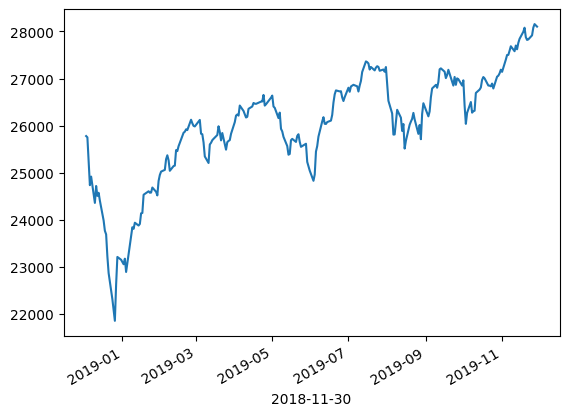

In [ ]:
ts.plot()

In [ ]:
ts_log = np.log(ts)

split = int(len(ts_log)*0.85)

train, test = ts_log[:split], ts_log[split:]

In [ ]:
adfuller(ts_log)[1]

0.7028237306682528

(<Figure size 640x480 with 1 Axes>, <Figure size 640x480 with 1 Axes>)

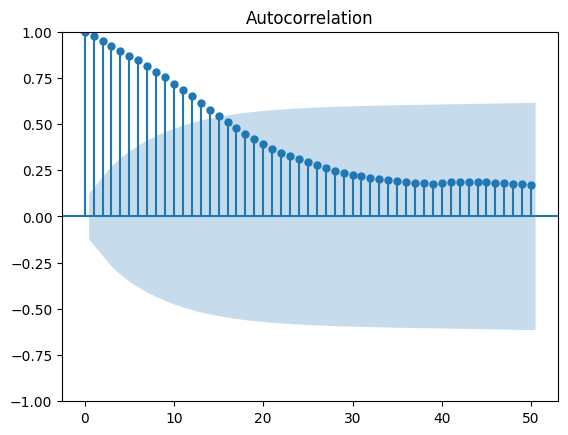

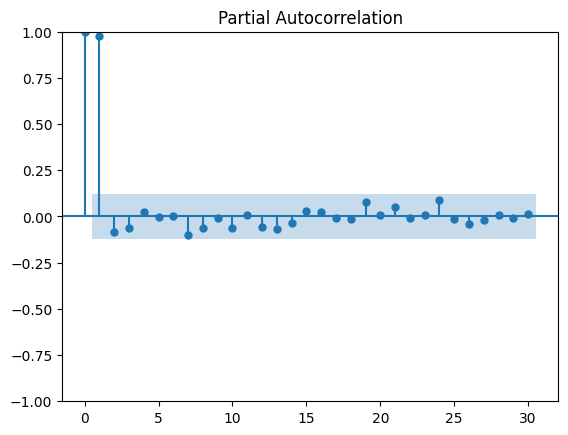

In [ ]:
plot_acf(ts_log, lags = 50), plot_pacf(ts_log,lags = 30)

In [ ]:
adfuller(ts.diff(1).dropna())[1]

7.270680965724108e-27

In [ ]:
from pmdarima import auto_arima

In [ ]:
model = auto_arima(
     ts_log, start_p=0, start_q=0,
     max_p=3, max_q=3, m =12,
     start_P=0, start_Q=0, seasonal=True,
     d=1, D=1, trace=True,
     error_action='ignore',
     suppress_warnings=True,
     stepwise=True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-1455.646, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-1518.444, Time=1.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-1545.418, Time=5.95 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-1453.792, Time=0.71 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-1543.089, Time=13.21 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-1551.813, Time=1.62 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-1550.232, Time=6.55 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=-1552.876, Time=2.46 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=3.19 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=-1551.191, Time=2.93 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-1541.609, Time=2.33 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=-1551.898, Time=4.21 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=-1550.095, Time=7.39 sec
 ARIMA(0,1,0)(0,1,2)[12] intercept   : AIC=-1551.491, Time=1.55 sec

Best mode

In [144]:
val = model.predict(len(test))

val.index = test.index


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [146]:
forecast = model.predict(30)

forecast.index = pd.date_range(ts_log.index[-1], freq = 'D', periods = 30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [147]:
plotting.plot_ts(ts, np.exp(val),np.exp(forecast))

(4 балла) Очень часто для решения тех или иных задач нам приходится определять период сезонности ряда. Мы это делаем, анализируя график временного ряда или его коррелограмму. Однако, если бы мы захотели автоматизировать решение задачи, нам пришлось бы придумать автоматический способ нахождения сезонности. Попробуйте реализовать функцию get_seasonal_period(ts) которая: а) Находит период сезонности по функции acf. б) Находит период сезонности через периодограмму (https://ru.wikipedia.org/wiki/Периодограмма). Реализацию такого разложения в python вы можете найти в scipy.signal.periodogram

In [4]:
from scipy import signal as sig
from sklearn.linear_model import LinearRegression
from pyloess import loess

In [5]:
long = dataset['daily-min-temperatures.csv']

sh = dataset['hour_3019.csv']

short_season_trend = dataset['international-airline-passengers.csv']

<AxesSubplot:xlabel='2019-05-30T10:00:00'>

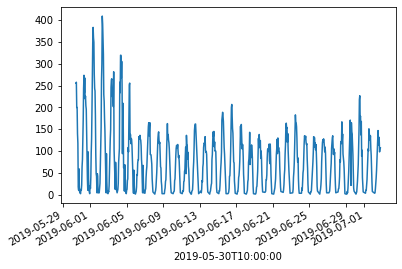

In [6]:
sh.plot()

<AxesSubplot:xlabel='1981-01-01'>

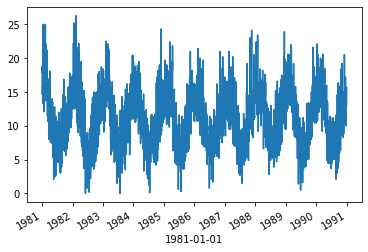

In [7]:
long.plot()

<AxesSubplot:xlabel='1949-01'>

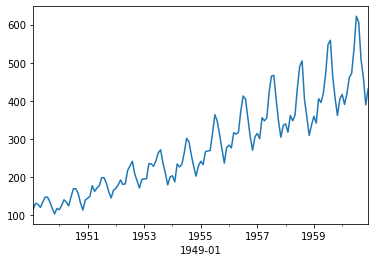

In [8]:
short_season_trend.plot()

In [9]:
def detrend_ts(ts, method = 'linear'):
    'Вычисляем тренд'
    if method == 'linear':
        model = LinearRegression()
        model.fit(np.arange(0,ts.shape[0]).reshape(-1,1),ts.values)
        trend = model.predict(np.arange(0,ts.shape[0]).reshape(-1,1))
    else:
        trend = loess(np.arange(0, len(ts.index)),ts.values,np.arange(0, len(ts.index)), degree = 1, span = .3)
        det = ts - trend
    
    return trend

In [10]:
def get_seasonal_period(ts, method = 'linear'):
    """Возвращает сезонность ряда"""

    trend = detrend_ts(ts,method = method)
    det = ts - trend
    
        
    #Фурье преобразование
    four = np.fft.rfft(det)
    mag = np.abs(four)
    
    #Частота
    freq = np.fft.rfftfreq(ts.shape[0])
    freq = 1/freq
    
    plt.plot(freq,mag)
    plt.title('Periodogramma')
    

    return round(pd.Series(data = mag, index = freq).sort_values(ascending=False).index[0])
    

C:\Users\quel\AppData\Local\Temp\ipykernel_9596\3470079996.py:14: RuntimeWarning: divide by zero encountered in true_divide
  freq = 1/freq


365

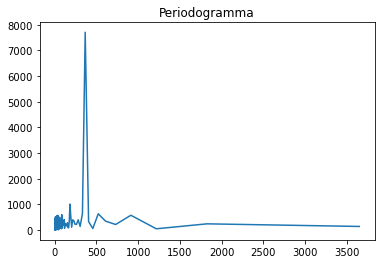

In [11]:
get_seasonal_period(long,method='linea')

C:\Users\quel\AppData\Local\Temp\ipykernel_9596\3470079996.py:14: RuntimeWarning: divide by zero encountered in true_divide
  freq = 1/freq


23

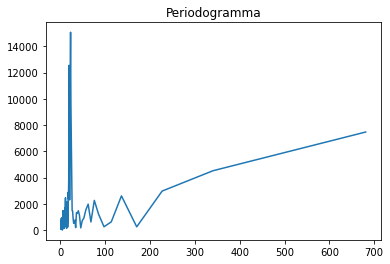

In [12]:
get_seasonal_period(sh,method='linear')

C:\Users\quel\AppData\Local\Temp\ipykernel_9596\3470079996.py:14: RuntimeWarning: divide by zero encountered in true_divide
  freq = 1/freq


12

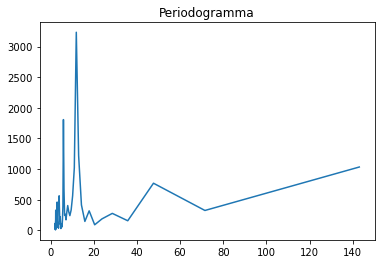

In [13]:
get_seasonal_period(short_season_trend,method='linear')